In [1]:
# First importing pandas library , giving it an alias "pd"

import pandas as pd

# loading  file
df = pd.read_csv("high-school-directory.csv")

# showing the first few rows
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [3]:
# Examining column names to determine exactly what needs to be cleaned

df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [13]:
# cleaning columns names 

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [115]:
# Filtering, counting , grouping by & reseting index 

# The Bronx has a higher number of schools in higher-numbered community districts compared to Queens.

df_filtered = df[df['borough'].isin(['Queens', 'Bronx']) & (df['community_districts']> 10)]
result = df_filtered.groupby('borough')['school_name'].nunique()
result.sort_values(ascending=False).reset_index()

,borough,school_name
0,Bronx,111
1,Queens,80


<Axes: xlabel='borough', ylabel='school_name'>

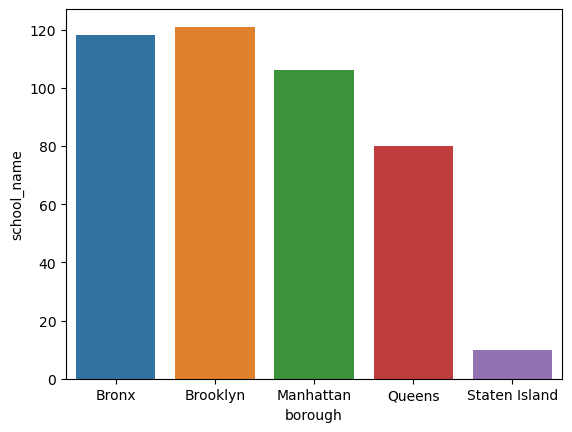

In [117]:
# Count schools by borough and visualize the result using a bar plot with the Seaborn library

# The Bronx and Brooklyn have the highest number of unique schools, 
# followed by Manhattan, Queens, and finally Staten Island, which has significantly fewer.

school_counts = df.groupby('borough')['school_name'].nunique().rset_index()

import seaborn as sns

sns.barplot(data=school_counts, x='borough', y='school_name')
